In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Lasso , LassoCV , Ridge , RidgeCV , ElasticNet , ElasticNetCV
sns.set()

In [2]:
dataset = pd.read_csv('Admission_Prediction.csv')

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


## Feature Engineering

In [4]:
dataset.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [5]:
dataset['GRE Score'].fillna(dataset['GRE Score'].mean() ,inplace = True)
dataset['TOEFL Score'].fillna(dataset['TOEFL Score'].mean() ,inplace = True)
dataset['University Rating'].fillna(dataset['University Rating'].mean() ,inplace = True)

In [6]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
dataset.drop(columns=['Serial No.'] , inplace=True)
X = dataset.copy()
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


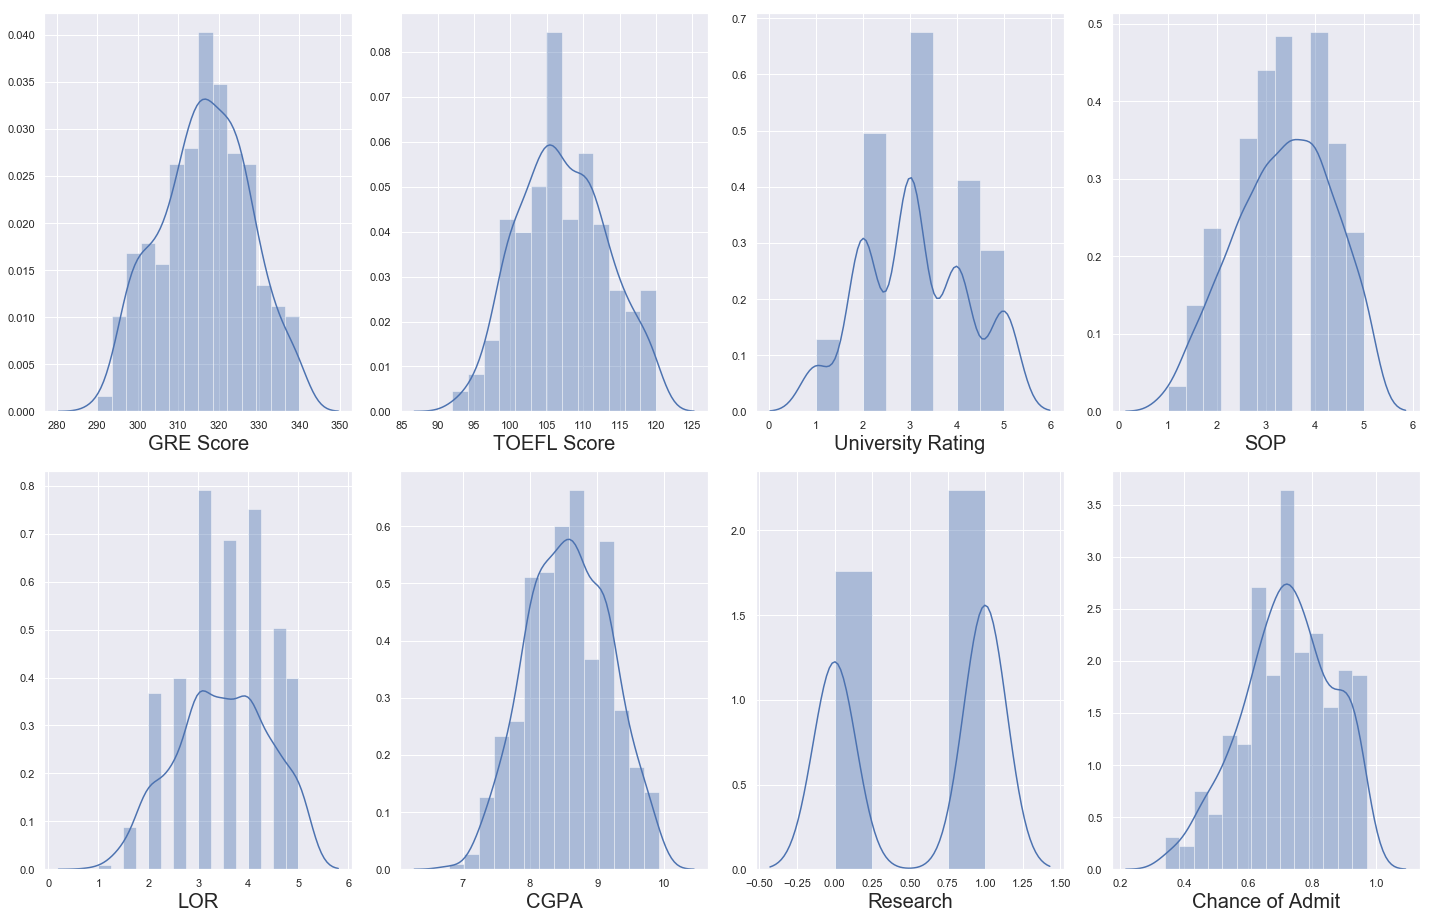

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:

    if(plotnumber<=9) :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [9]:
y = X['Chance of Admit']
X.drop(columns=['Chance of Admit'] , inplace = True)

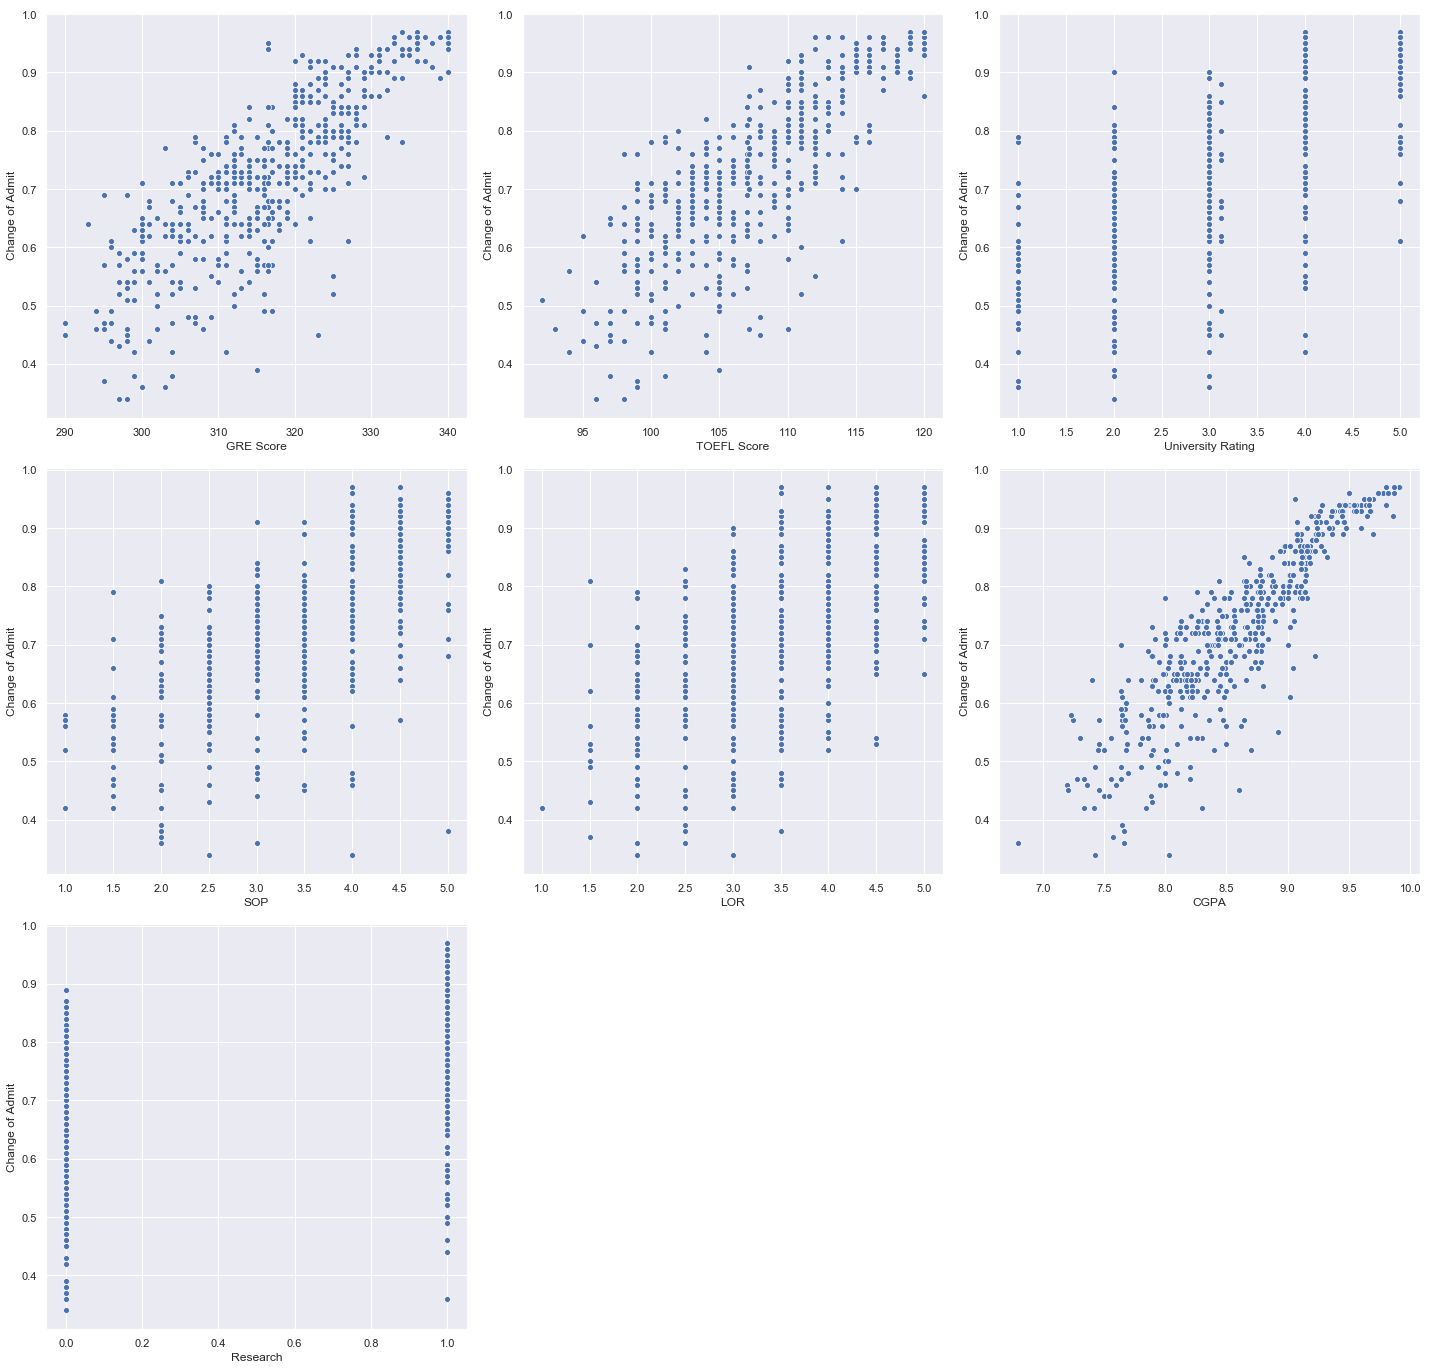

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for col in X:
    if plotnumber <= 10:
        ax = plt.subplot(4,3 ,plotnumber)
        sns.scatterplot(X[col] , y)
        plt.xlabel(col)
        plt.ylabel('Change of Admit')
    plotnumber = plotnumber +1 
plt.tight_layout()

**Observation: From the above graph we can see that the graph is having a linear relationship with the target variable**

In [11]:
## feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset)
X_scaled

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.77680627e+00,  8.86405260e-01,  1.40610734e+00],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         4.85859428e-01,  8.86405260e-01,  2.71349071e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
        -9.54042814e-01,  8.86405260e-01, -1.23404962e-02],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.62785086e+00,  8.86405260e-01,  1.47702973e+00],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
        -2.42366993e-01, -1.12815215e+00,  5.85818956e-02],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         7.67219636e-01, -1.12815215e+00,  8.38728205e-01]])

In [13]:
scaled = pd.DataFrame(X_scaled , columns=dataset.columns)
scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405,1.406107
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405,0.271349
2,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


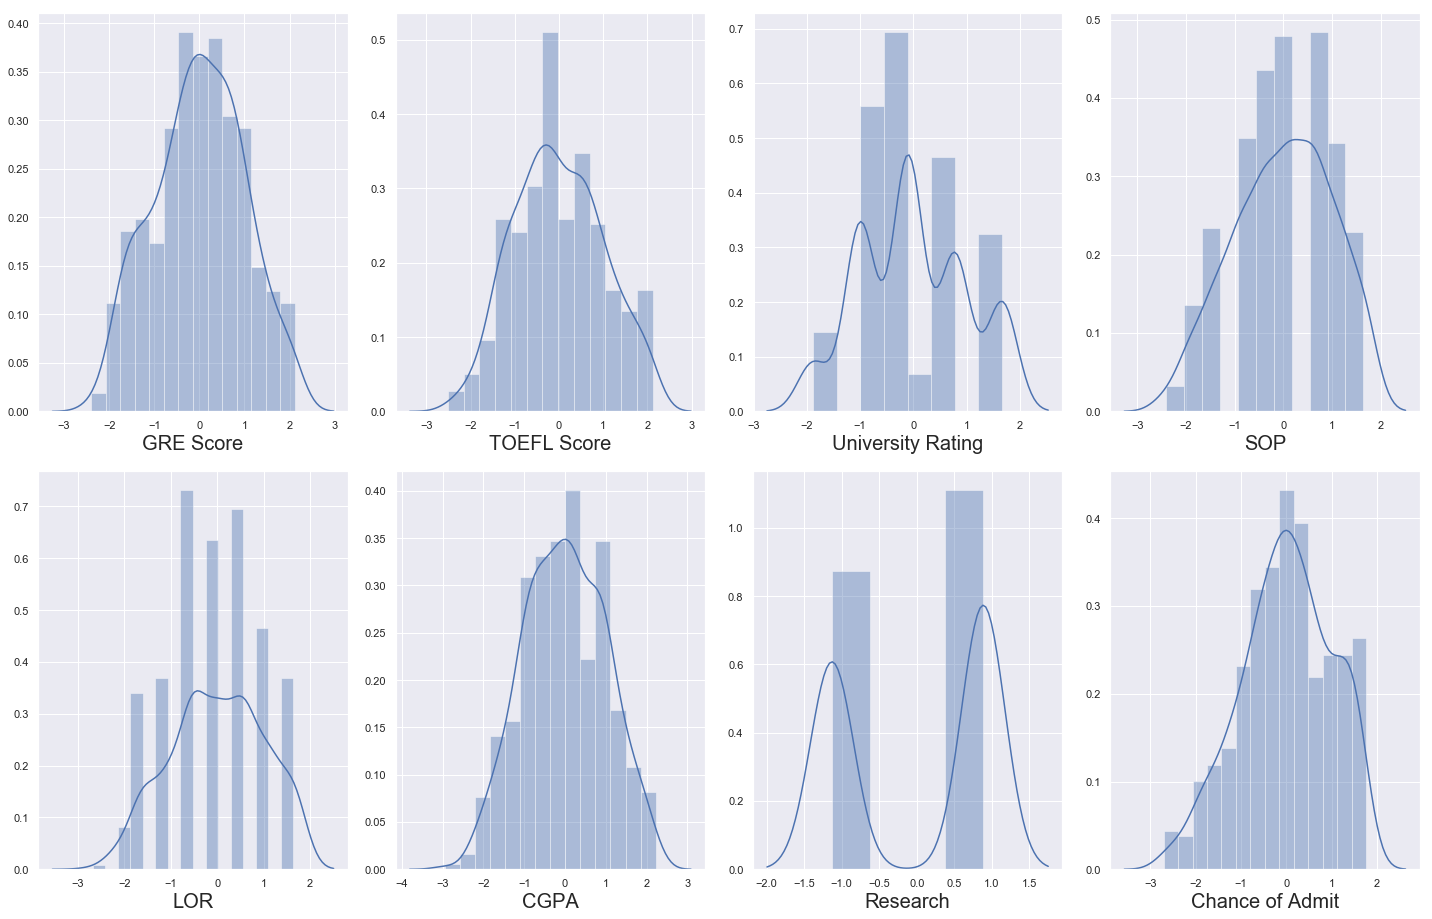

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in scaled:

    if(plotnumber<=9) :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(scaled[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Model Training

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X , y ,test_size = 0.3 , random_state = 0)

In [16]:
# linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# creating a pickle file
import pickle
filename = 'final_model.pickle'
pickle.dump(linear_model , open(filename , 'wb'))
#pickle.dump(scaler , open('scaler.pickle' , 'wb'))

In [18]:
linear_model.score(X_train , y_train)

0.8314012692298995

In [19]:
linear_model.score(X_test , y_test)

0.786856628844498

In [20]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = linear_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [21]:
adj_r2(X_train,y_train)

0.8279504180153068

In [27]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[300.0,110.0,5.222,5.2,5,10,1]])
a

array([0.91486797])

In [ ]:
# Lasso Regression model
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

In [ ]:
lasscv.alpha_

In [ ]:
lasso = Lasso(alpha=lasscv.alpha_)
lasso.fit(X_train , y_train)

In [ ]:
lasso.score(X_train , y_train)

In [ ]:
lasso.score(X_test , y_test)

In [ ]:
# ridge Regression Model
ridgecv = RidgeCV(alphas = (0.1 ,10 ,50),cv =10)
ridgecv.fit(X_train , y_train)

In [ ]:
ridgecv.alpha_

In [ ]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train , y_train)

In [ ]:
ridge.score(X_train , y_train)

In [ ]:
ridge.score(X_test , y_test)

**Observation : All the score for the test is same that means we dont have any overfitting for you linear regression.**

## Feature Selection 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
tree = ExtraTreesRegressor()
tree.fit(X_scaled , y)

In [ ]:
tree.feature_importances_

In [ ]:
feature_importance = pd.Series(tree.feature_importances_ , index= dataset.columns)
feature_importance.nlargest(8).plot(kind = 'barh')